In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as NewsDetPd
import matplotlib.pyplot as Newsplt
import seaborn as Newsbrn
import warnings as NewsDetWng
NewsDetWng.filterwarnings('ignore')

In [ ]:
News_Detect = NewsDetPd.read_csv("/content/drive/MyDrive/Colab Notebooks/921458/Code/ProcessedNews_Covid19.csv")
News_Detect

,Text,Label
0,Tencent revealed the real number of deaths.\t\t,0
1,Taking chlorine dioxide helps fight coronavir...,0
2,This video shows workmen uncovering a bat-inf...,0
3,The Asterix comic books and The Simpsons pred...,0
4,Chinese President Xi Jinping visited a mosque...,0
...,...,...
7251,Global COVID-19 prevention trial of hydroxychl...,1
7252,Bavaria's free COVID-19 test for all splits Ge...,1
7253,Britain locks down city of Leicester after COV...,1
7254,UK imposes lockdown on city of Leicester to cu...,1


In [ ]:
!pip install gensim

In [ ]:
!pip install --upgrade numpy gensim
!pip install numpy==1.23.0 gensim==4.1.2
!pip install --upgrade pip setuptools wheel


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached numpy-1.23.0-cp311-cp311-linux_x86_64.whl
  Using cached gensim-4.1.2.tar.gz (23.2 MB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for gensim
  Running setup.py clean for gensim
Failed to build gensim
ERROR: Failed to build installable wheels for some pyproject.toml based projects (gensim)


In [ ]:
import re as NewsDetRE
from nltk.tokenize import word_tokenize as NewsDet_WrdTok
from nltk.corpus import stopwords as NewsDet_StWords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from gensim.models.fasttext import FastText as NewsDet_Ftext

import nltk as NewsDetNltk
NewsDetNltk.download('punkt')
NewsDetNltk.download('stopwords')
NewsDetNltk.download('wordnet')
NewsDetNltk.download('punkt_tab')

def newspreprocess(nws, stemming=True, lemmatization=False):
    nws = NewsDetRE.sub(r'https?://\S+|www\.\S+', '', nws)  #==== Removing URLs
    nws = NewsDetRE.sub(r'<.*?>', '', nws)  #===== Removing HTML tags
    nws = NewsDetRE.sub(r'[^a-zA-Z\s]', '', nws)  #===== Removing special characters
    nws = nws.lower()  #====== Converting lowercase

    #===== Tokenizing text
    tok_news = NewsDet_WrdTok(nws)

    #===== Removing stopwords
    news_stwords = set(NewsDet_StWords.words('english'))
    tok_news = [wrd for wrd in tok_news if wrd not in news_stwords]

    #====== Applying stemming or lemmatization
    if stemming:
        stemmer = PorterStemmer()
        tok_news = [stemmer.stem(wrd) for wrd in tok_news]
    elif lemmatization:
        lemmatizer = WordNetLemmatizer()
        tok_news = [lemmatizer.lemmatize(wrd) for wrd in tok_news]

    return tok_news

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
News_Detect

,Text,Label
0,Tencent revealed the real number of deaths.\t\t,0
1,Taking chlorine dioxide helps fight coronavir...,0
2,This video shows workmen uncovering a bat-inf...,0
3,The Asterix comic books and The Simpsons pred...,0
4,Chinese President Xi Jinping visited a mosque...,0
...,...,...
7251,Global COVID-19 prevention trial of hydroxychl...,1
7252,Bavaria's free COVID-19 test for all splits Ge...,1
7253,Britain locks down city of Leicester after COV...,1
7254,UK imposes lockdown on city of Leicester to cu...,1


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer as NewsDet_Tfvect
from sklearn.decomposition import PCA as NewsDetPcomponent
from sklearn.model_selection import train_test_split as NewsDet_trntst

#======== Input and Output
News_DetectX = News_Detect.drop('Text',axis=1)
News_DetectY = News_Detect['Text']

#======== Vectorization Covid19
NewsDetect_Vtc = NewsDet_Tfvect(analyzer='word',ngram_range= (1,1))
News_DetectX = NewsDetect_Vtc.fit_transform(News_Detect['Text'].values.astype('U')).toarray()
print("Vectorized Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Reducting Dimensions Covid19
newsdetPca = NewsDetPcomponent(n_components = 100)
News_DetectX = newsdetPca.fit_transform(News_DetectX)
print("\nReduction Shape of Covid19 FastText News: ",News_DetectX.shape)

#======== Splitting 60-20-20 ratio Covid19
News_Detect['Label'] = News_Detect['Label'].astype(int)
NewsDetX_tr, NewsDetX_ts, NewsDetY_tr, NewsDetY_ts = NewsDet_trntst(News_DetectX, News_Detect['Label'], test_size=0.4, random_state=70)
NewsDetX_va, NewsDetX_ts, NewsDetY_va, NewsDetY_ts = NewsDet_trntst(NewsDetX_ts, NewsDetY_ts, test_size=0.5, random_state=70)
print("\nTraining Covid19 FastText News: ",NewsDetX_tr.shape)
print("Validation Covid19 FastText News: ",NewsDetX_va.shape)
print("Testing Covid19 FastText News: ",NewsDetX_ts.shape)

Vectorized Shape of Covid19 FastText News:  (7256, 17446)

Reduction Shape of Covid19 FastText News:  (7256, 100)

Training Covid19 FastText News:  (4353, 100)
Validation Covid19 FastText News:  (1451, 100)
Testing Covid19 FastText News:  (1452, 100)


Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 169ms/step - accuracy: 0.5024 - loss: 0.2494 - val_accuracy: 0.5300 - val_loss: 0.2471
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 190ms/step - accuracy: 0.5167 - loss: 0.2471 - val_accuracy: 0.5507 - val_loss: 0.2457
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 223ms/step - accuracy: 0.5399 - loss: 0.2461 - val_accuracy: 0.5631 - val_loss: 0.2438
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.5615 - loss: 0.2434 - val_accuracy: 0.5548 - val_loss: 0.2417
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.5820 - loss: 0.2404 - val_accuracy: 0.5686 - val_loss: 0.2397
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - accuracy: 0.5797 - loss: 0.2381 - val_accuracy: 0.5706 - val_loss: 0.2379
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 183ms/step - accuracy: 0.5763 - loss: 0.2364 - val_accuracy: 0.5720 - val_loss: 0.2363
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - accuracy: 0.5657 - loss: 0.2370 - val_accuracy: 0.5734 - val_loss:

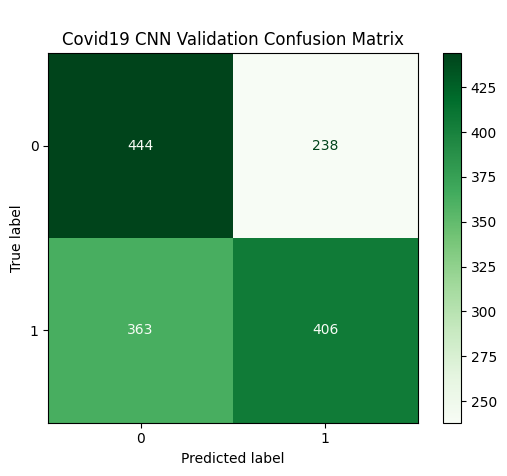

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Covid19 CNN Test - Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.63      0.58       670
           1       0.63      0.54      0.58       782

    accuracy                           0.58      1452
   macro avg       0.59      0.59      0.58      1452
weighted avg       0.59      0.58      0.58      1452



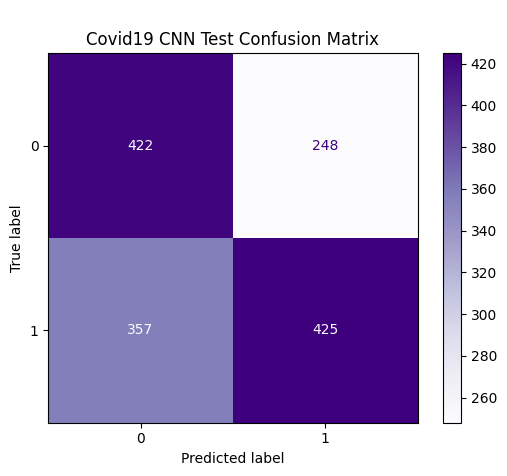

In [ ]:
import numpy as NewsDetNpp
import matplotlib.pyplot as Newsplt
from tensorflow.keras.models import Sequential as NewsDetSeqnt
from tensorflow.keras.optimizers import Adam as NewsDetAdmm
from sklearn.metrics import classification_report as NewsDetClfrpt
from sklearn.metrics import confusion_matrix as NewsDetCnMtrx
from tensorflow.keras.layers import Dense, Dropout, Conv1D, GlobalMaxPooling1D, Flatten, Input
from sklearn.metrics import ConfusionMatrixDisplay as NewsDetDsp

NewsDetIp_shape = NewsDetX_tr.shape[1]

#======== Define CNN model for Covid19
NewsDet_Mod = NewsDetSeqnt([
    Input(shape=(NewsDetIp_shape, 1)),
    Conv1D(filters=128, kernel_size=3, activation='tanh', padding='same'),
    GlobalMaxPooling1D(),
    Dense(64, activation='tanh'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#============ Compile CNN for Covid19
NewsDet_Mod.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

#============ Train CNN for Covid19
NewsDet_Modhist = NewsDet_Mod.fit(NewsDetX_tr,NewsDetY_tr, validation_data=(NewsDetX_va, NewsDetY_va),epochs=20,batch_size=500)

#============ Validate CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_va) > 0.5).astype(int)
print("\nCovid19 CNN Validation - Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 CNN Validation Confusion Matrix')
Newsplt.show()

#============= Test CNN for Covid19
NewsDet_Ypd = (NewsDet_Mod.predict(NewsDetX_ts) > 0.5).astype(int)
print("\nCovid19 CNN Test - Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 CNN Test Confusion Matrix')
Newsplt.show()

### Random Forest

Random Forest - Best Parameters:

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 90, 'n_jobs': 1}

Covid19 Validation - RF Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       682
           1       0.97      0.96      0.96       769

    accuracy                           0.96      1451
   macro avg       0.96      0.96      0.96      1451
weighted avg       0.96      0.96      0.96      1451



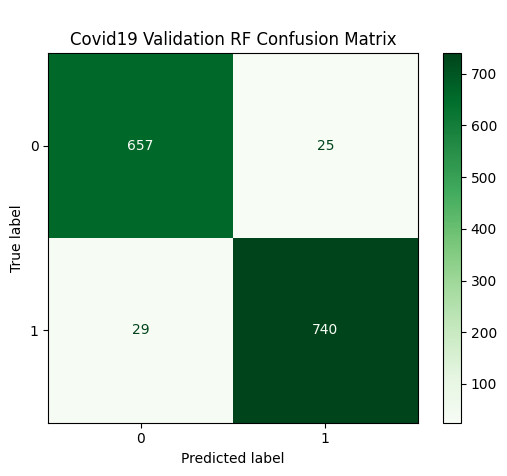


Covid19 Test - RF Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       670
           1       0.97      0.96      0.97       782

    accuracy                           0.96      1452
   macro avg       0.96      0.96      0.96      1452
weighted avg       0.96      0.96      0.96      1452



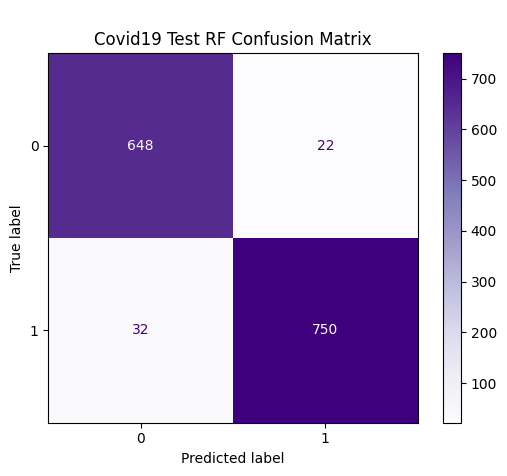

In [ ]:
from sklearn.ensemble import RandomForestClassifier as NewsDet_RanFC
from sklearn.model_selection import GridSearchCV as NewsDet_GridCV
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

NewsDetPmeters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 1, 2, 3],
    'n_estimators': [20, 30, 90],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_RanFC(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Random Forest - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - RF Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation RF Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - RF Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test RF Confusion Matrix')
Newsplt.show()

### Logistic Regression

Logistic Regression - Best Parameters:

{'C': 0.8, 'fit_intercept': True, 'n_jobs': 1, 'penalty': 'l2', 'solver': 'newton-cg'}

Covid19 Validation - LR Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       682
           1       0.98      0.97      0.97       769

    accuracy                           0.97      1451
   macro avg       0.97      0.97      0.97      1451
weighted avg       0.97      0.97      0.97      1451



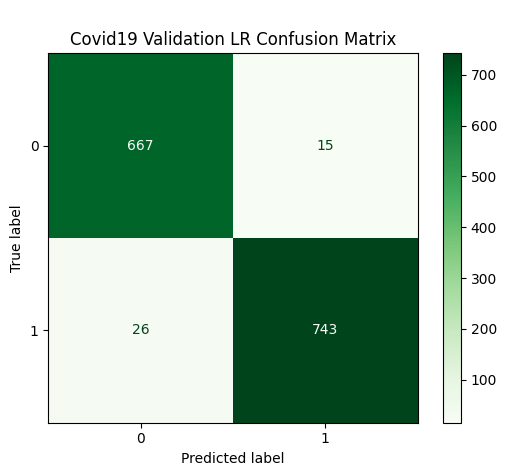


Covid19 Test - LR Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       670
           1       0.99      0.96      0.98       782

    accuracy                           0.98      1452
   macro avg       0.97      0.98      0.98      1452
weighted avg       0.98      0.98      0.98      1452



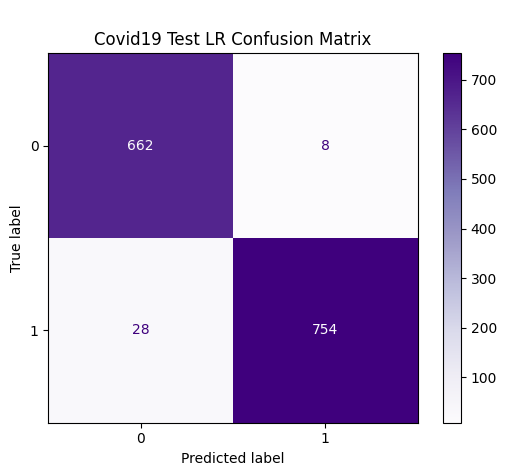

In [ ]:
from sklearn.linear_model import LogisticRegression as NewsDet_LReg
NewsDetPmeters = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'C': [0.1, 0.2, 0.3, 0.8],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_LReg(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Logistic Regression - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - LR Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation LR Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - LR Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test LR Confusion Matrix')
Newsplt.show()

### Extra Trees

Extra Trees - Best Parameters:

{'criterion': 'gini', 'max_depth': None, 'n_estimators': 90, 'n_jobs': 1}

Covid19 Validation - ET Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.97       682
           1       0.99      0.95      0.97       769

    accuracy                           0.97      1451
   macro avg       0.97      0.97      0.97      1451
weighted avg       0.97      0.97      0.97      1451



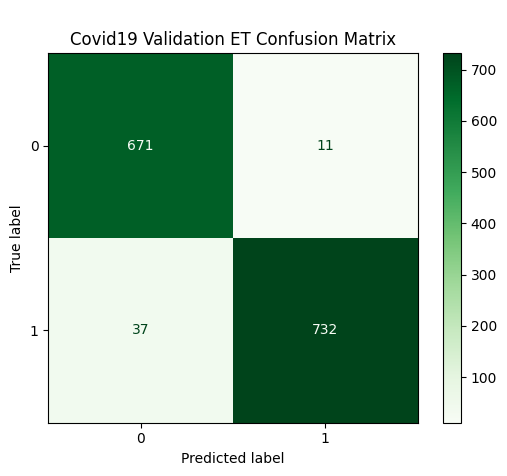


Covid19 Test - ET Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       670
           1       0.99      0.96      0.98       782

    accuracy                           0.97      1452
   macro avg       0.97      0.98      0.97      1452
weighted avg       0.97      0.97      0.97      1452



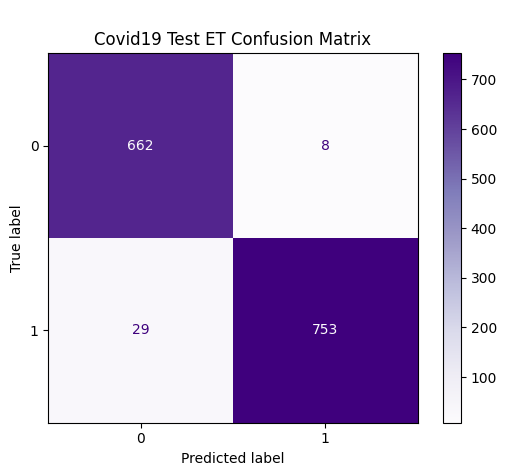

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier as NewsDet_ExTr

NewsDetPmeters = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'max_depth': [None, 1, 2, 3],
    'n_estimators': [20, 30, 90],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_ExTr(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Extra Trees - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - ET Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation ET Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - ET Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test ET Confusion Matrix')
Newsplt.show()

### Gradient Boosting Machine

Gradient Boosting Machine - Best Parameters:

{'learning_rate': 0.2, 'loss': 'log_loss', 'min_samples_split': 4, 'n_estimators': 90}

Covid19 Validation - GB Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       682
           1       0.97      0.98      0.97       769

    accuracy                           0.97      1451
   macro avg       0.97      0.97      0.97      1451
weighted avg       0.97      0.97      0.97      1451



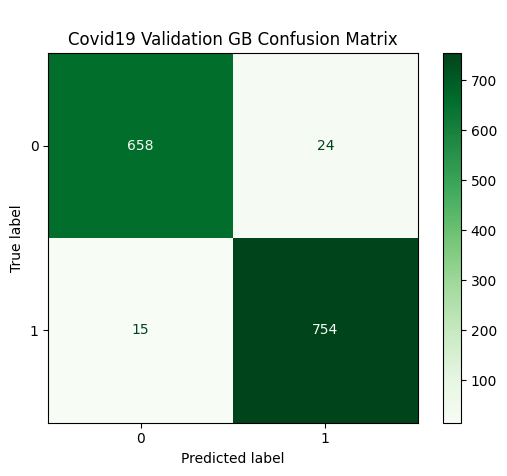


Covid19 Test - GB Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       670
           1       0.98      0.98      0.98       782

    accuracy                           0.98      1452
   macro avg       0.98      0.98      0.98      1452
weighted avg       0.98      0.98      0.98      1452



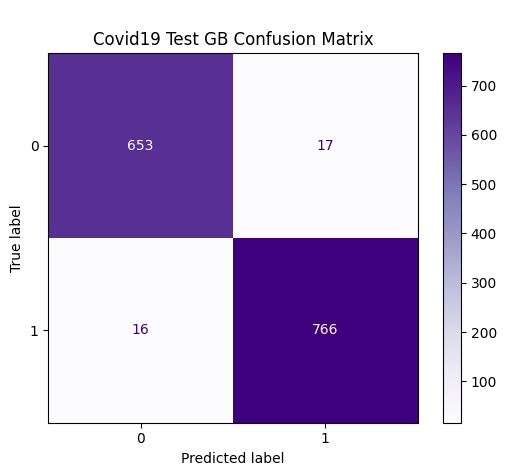

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier as NewsDet_GBMachine
NewsDetPmeters = {
    'loss': ['log_loss', 'exponential', 'log_loss'],
    'learning_rate': [0.1, 0.001, 0.0001, 0.2],
    'n_estimators': [20, 30, 90],
    'min_samples_split': [1, 2, 4],
}

NewsDetClfier = NewsDet_GBMachine(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Gradient Boosting Machine - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - GB Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation GB Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - GB Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test GB Confusion Matrix')
Newsplt.show()

### Stochastic Gradient Descent

Stochastic Gradient Descent - Best Parameters:

{'alpha': 1e-05, 'fit_intercept': True, 'loss': 'hinge', 'n_jobs': 1, 'penalty': 'l2'}

Covid19 Validation - SGD Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       682
           1       0.96      0.99      0.98       769

    accuracy                           0.97      1451
   macro avg       0.98      0.97      0.97      1451
weighted avg       0.97      0.97      0.97      1451



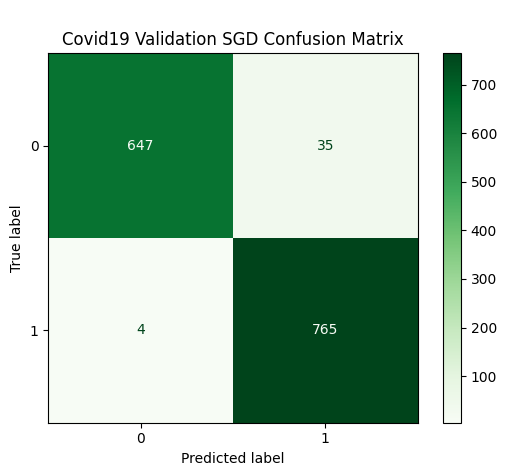


Covid19 Test - SGD Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       670
           1       0.97      0.99      0.98       782

    accuracy                           0.98      1452
   macro avg       0.98      0.98      0.98      1452
weighted avg       0.98      0.98      0.98      1452



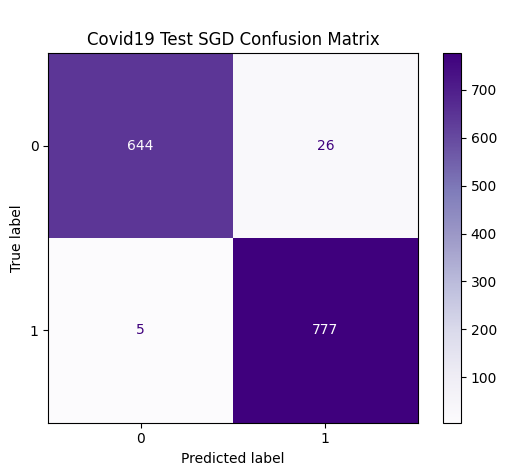

In [ ]:
from sklearn.linear_model import SGDClassifier as NewsDet_SGradienr
NewsDetPmeters = {
    'loss': ['hinge', 'log_loss', 'modified_huber','squared_hinge','perceptron'],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'alpha': [0.1, 0.02, 0.001, 0.00001],
    'fit_intercept': [True, False],
    'n_jobs': [1, 2, 4],
}

NewsDetClfier = NewsDet_SGradienr(random_state=70)
NewsDetGrsrch = NewsDet_GridCV(estimator=NewsDetClfier, param_grid=NewsDetPmeters, cv=2)
NewsDetGrsrch.fit(NewsDetX_tr, NewsDetY_tr)

print("Stochastic Gradient Descent - Best Parameters:\n")
print(NewsDetGrsrch.best_params_)
NewsDet_BstMod = NewsDetGrsrch.best_estimator_

#====== Train the Covid19 FastText
NewsDet_BstMod.fit(NewsDetX_tr, NewsDetY_tr)

#======= Predict on Covid19 FastText validation
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_va)
print("\nCovid19 Validation - SGD Classification Report:")
print(NewsDetClfrpt(NewsDetY_va, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_va, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Greens')
Newsplt.title('\nCovid19 Validation SGD Confusion Matrix')
Newsplt.show()

#======== Predict on Covid19 FastText Testing
NewsDet_Ypd = NewsDet_BstMod.predict(NewsDetX_ts)
print("\nCovid19 Test - SGD Classification Report:")
print(NewsDetClfrpt(NewsDetY_ts, NewsDet_Ypd))

NewsDet_CfM = NewsDetCnMtrx(NewsDetY_ts, NewsDet_Ypd)
NewsDetDsp(confusion_matrix=NewsDet_CfM, display_labels=[0, 1]).plot(cmap='Purples')
Newsplt.title('\nCovid19 Test SGD Confusion Matrix')
Newsplt.show()